In [1]:
from manim import *
import numpy as np
config.media_width = "80%"
config.verbosity = "WARNING"    # 参数设置
config.background_color = BLACK

Manim Community v0.17.3

# Manim显示

## 创建场景
下面的例子给出了Manim一个基本场景创建的流程。需要注意的第一行在Jupyter当中是命令行运行的魔术指令，在 `py` 文件当中没有这种方法。

`Square` 是 `Mobject` 的派生类，还有其他类似的几何体可以直接翻阅源码。

### 基本场景

In [2]:
%%manim -qh SquareGenerate

class SquareGenerate(Scene):
    def construct(self):
        sq = Square(
        side_length=5,    # 边长
        stroke_color = GREEN,    # 边框颜色
        fill_color = BLUE,
        fill_opacity=0.75)

        self.play(Create(sq),run_time=3)
        self.play(Indicate(sq))    # 强调
        self.play(FadeOut(sq),run_time = 1)    # 消失

        self.wait(1)

## 位置

### 边界移动

In [3]:
%%manim -qh MovingToEdge

class MovingToEdge(Scene):
    def construct(self):
        text = Tex("\LaTeX").to_edge(UL,buff = 0.5)
        sq = Square(side_length=0.5,fill_color = GREEN).shift(LEFT+3)    #shift方法调换位置
        tri = Triangle().scale(0.6).to_edge(DR)    # DR右下角位置

        self.play(Write(text))

        self.play(DrawBorderThenFill(sq),run_time = 2)    # 先画边后填充
        self.play(Create(tri))

        self.wait()

### 像素与百分比

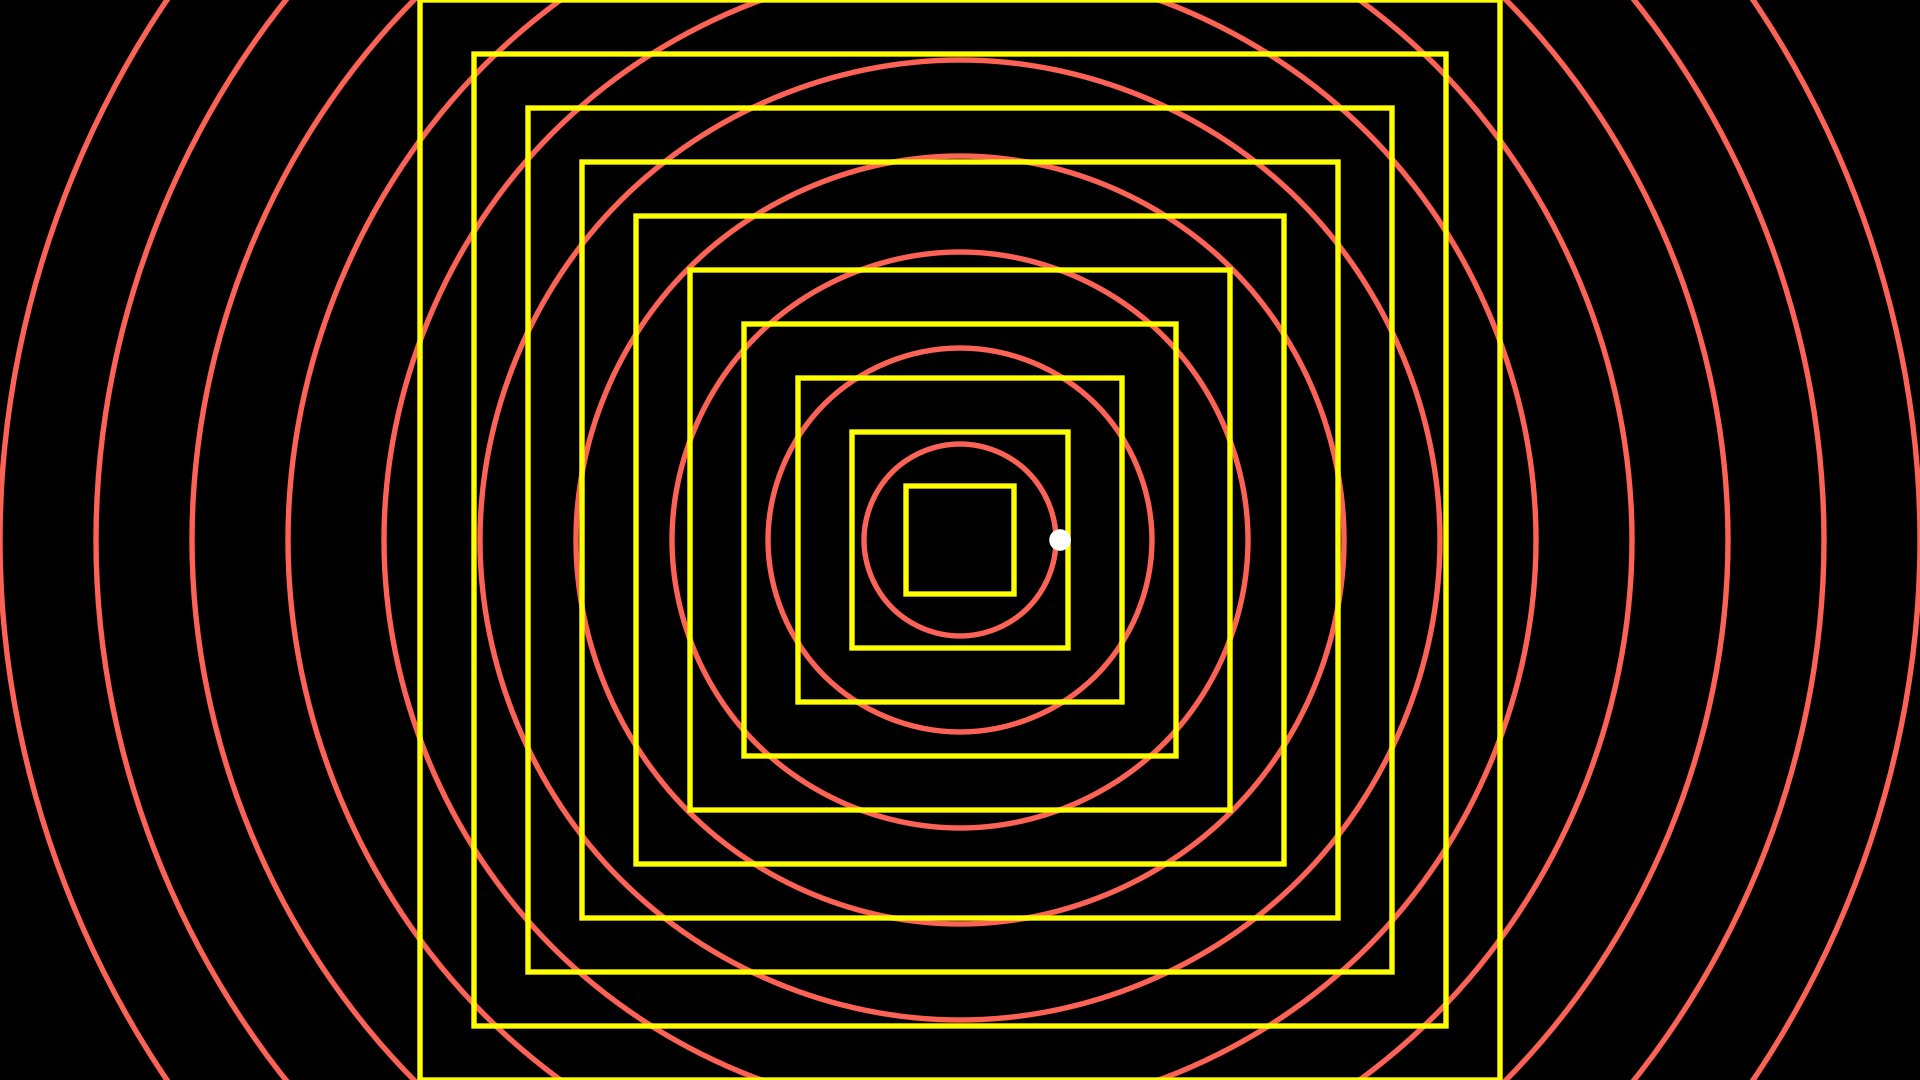

In [4]:
%%manim -qh PercentAndPixels
from manim.utils.unit import Percent,Pixels

class PercentAndPixels(Scene):
    def construct(self):
        for perc in range(5,51,5):
            self.add(Circle(radius = perc*Percent(X_AXIS)))
            self.add(Square(side_length=2*perc*Percent(Y_AXIS),color = YELLOW))

        d = Dot()
        d.shift(100*Pixels*RIGHT)    # 像素级别操作
        self.add(d)

### 元素对齐、成组

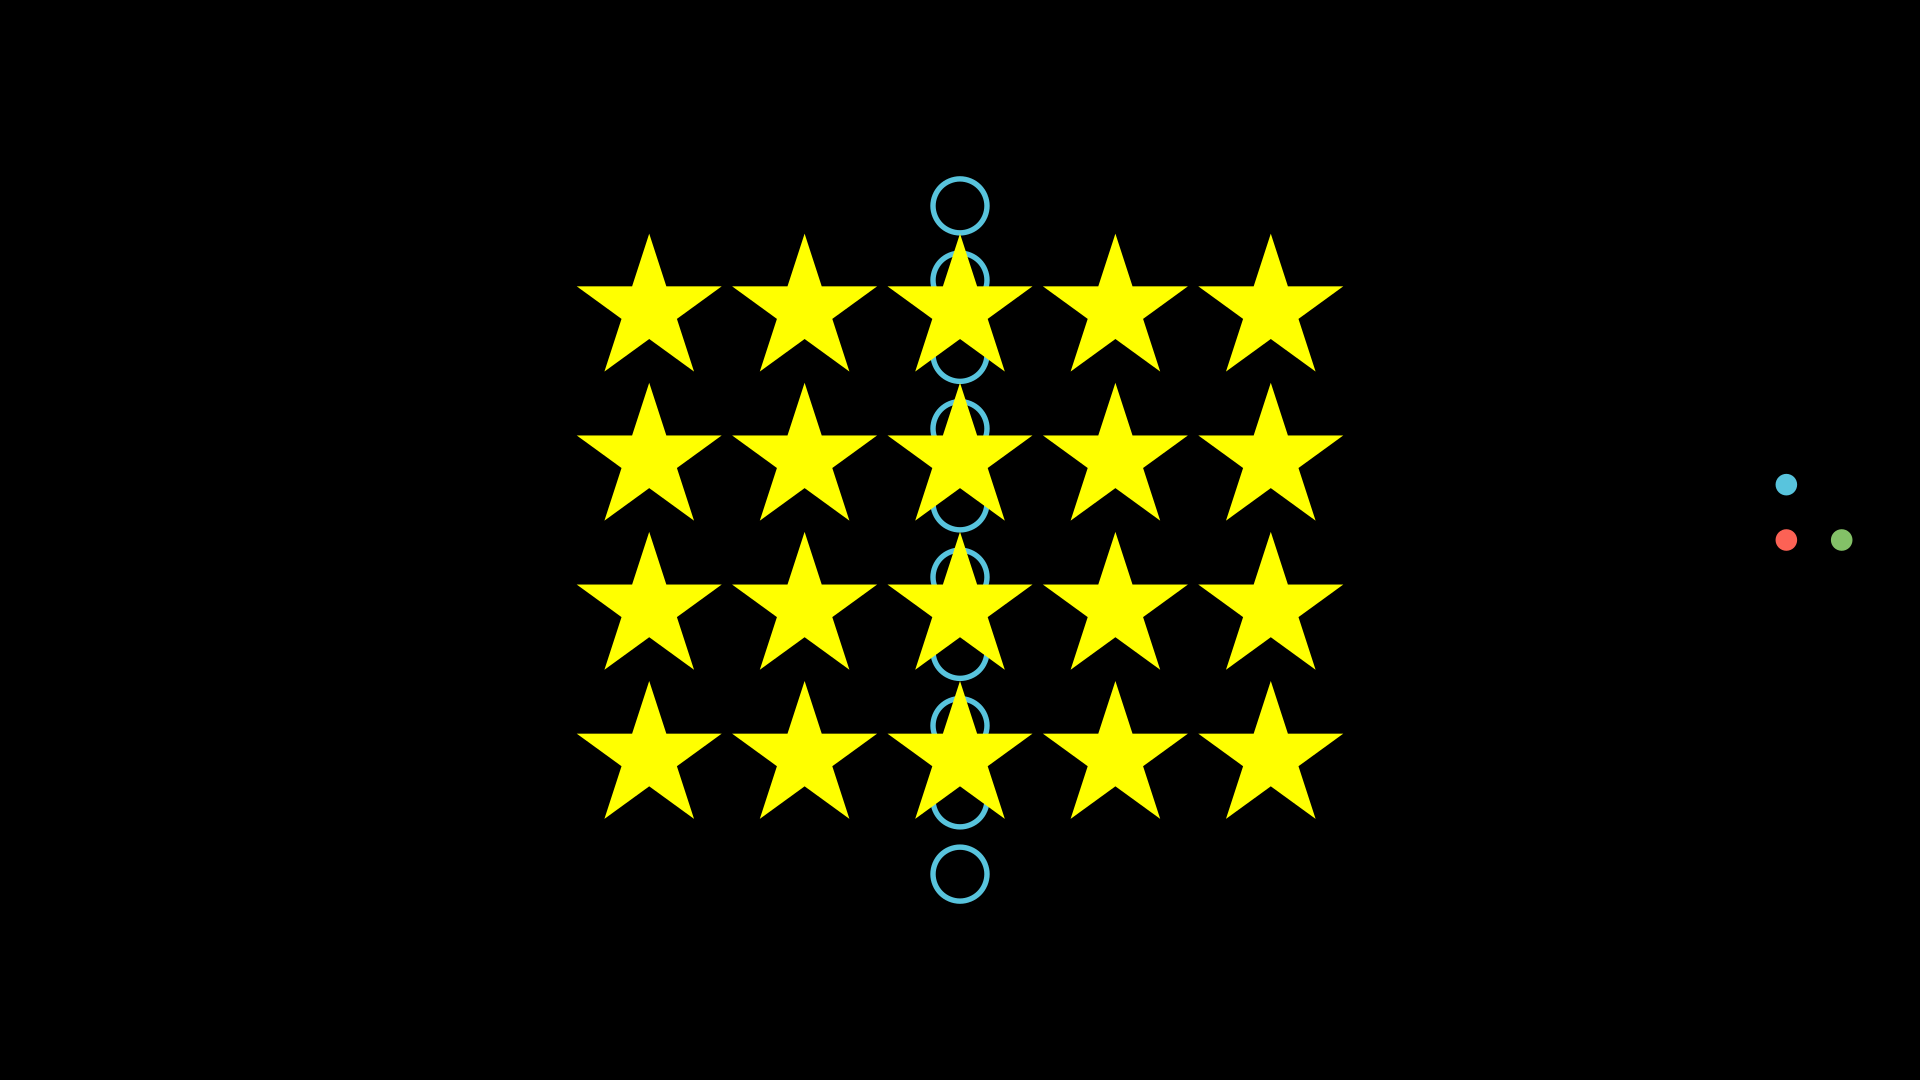

In [5]:
%%manim -qh Grouping
class Grouping(Scene):
    def construct(self):
        red_dot = Dot(color = RED)
        green_dot = Dot(color = GREEN).next_to(red_dot,RIGHT)
        blue_dot = Dot(color = BLUE).next_to(red_dot,UP)

        dot_group = VGroup(red_dot,green_dot,blue_dot)
        dot_group.to_edge(RIGHT)

        self.add(dot_group)

        # 成组生成
        
        circles = VGroup(*[Circle(radius=0.2,color=BLUE) for _ in range(10)])
        circles.arrange(UP,buff = 0.15)

        self.add(circles)

        # 满天星
        stars = VGroup(*[Star(color = YELLOW,fill_opacity=1).scale(0.5) for _ in range(20)])
        stars.arrange_in_grid(4,5,buff=0.2)    # 网格式生成
        self.add(stars)

## 文字与图形旋转、平移

In [6]:
%%manim -qh TextMoving

class TextMoving(Scene):
    def construct(self):
        text = Tex("\LaTeX").to_edge(UL,buff = 0.5)
        self.play(Write(text))
        self.play(text.animate.to_edge(UR),run_time=2)
        self.play(text.animate.to_edge(DR),run_time=2)
        self.play(text.animate.to_edge(DL),run_time=2)
        self.play(text.animate.shift(UP*5+RIGHT*5),run_time=2)
        self.play(FadeOut(text))

        # 图形同理
        square = Square(side_length=3,fill_color = BLUE,fill_opacity = 0.75).to_edge(UL)

        self.play(DrawBorderThenFill(square),run_time = 1)
        self.play(square.animate.to_edge(UR))

        self.play(square.animate.rotate(90))
        self.play(FadeOut(square))


        self.wait()

# 坐标系作图

## 平面

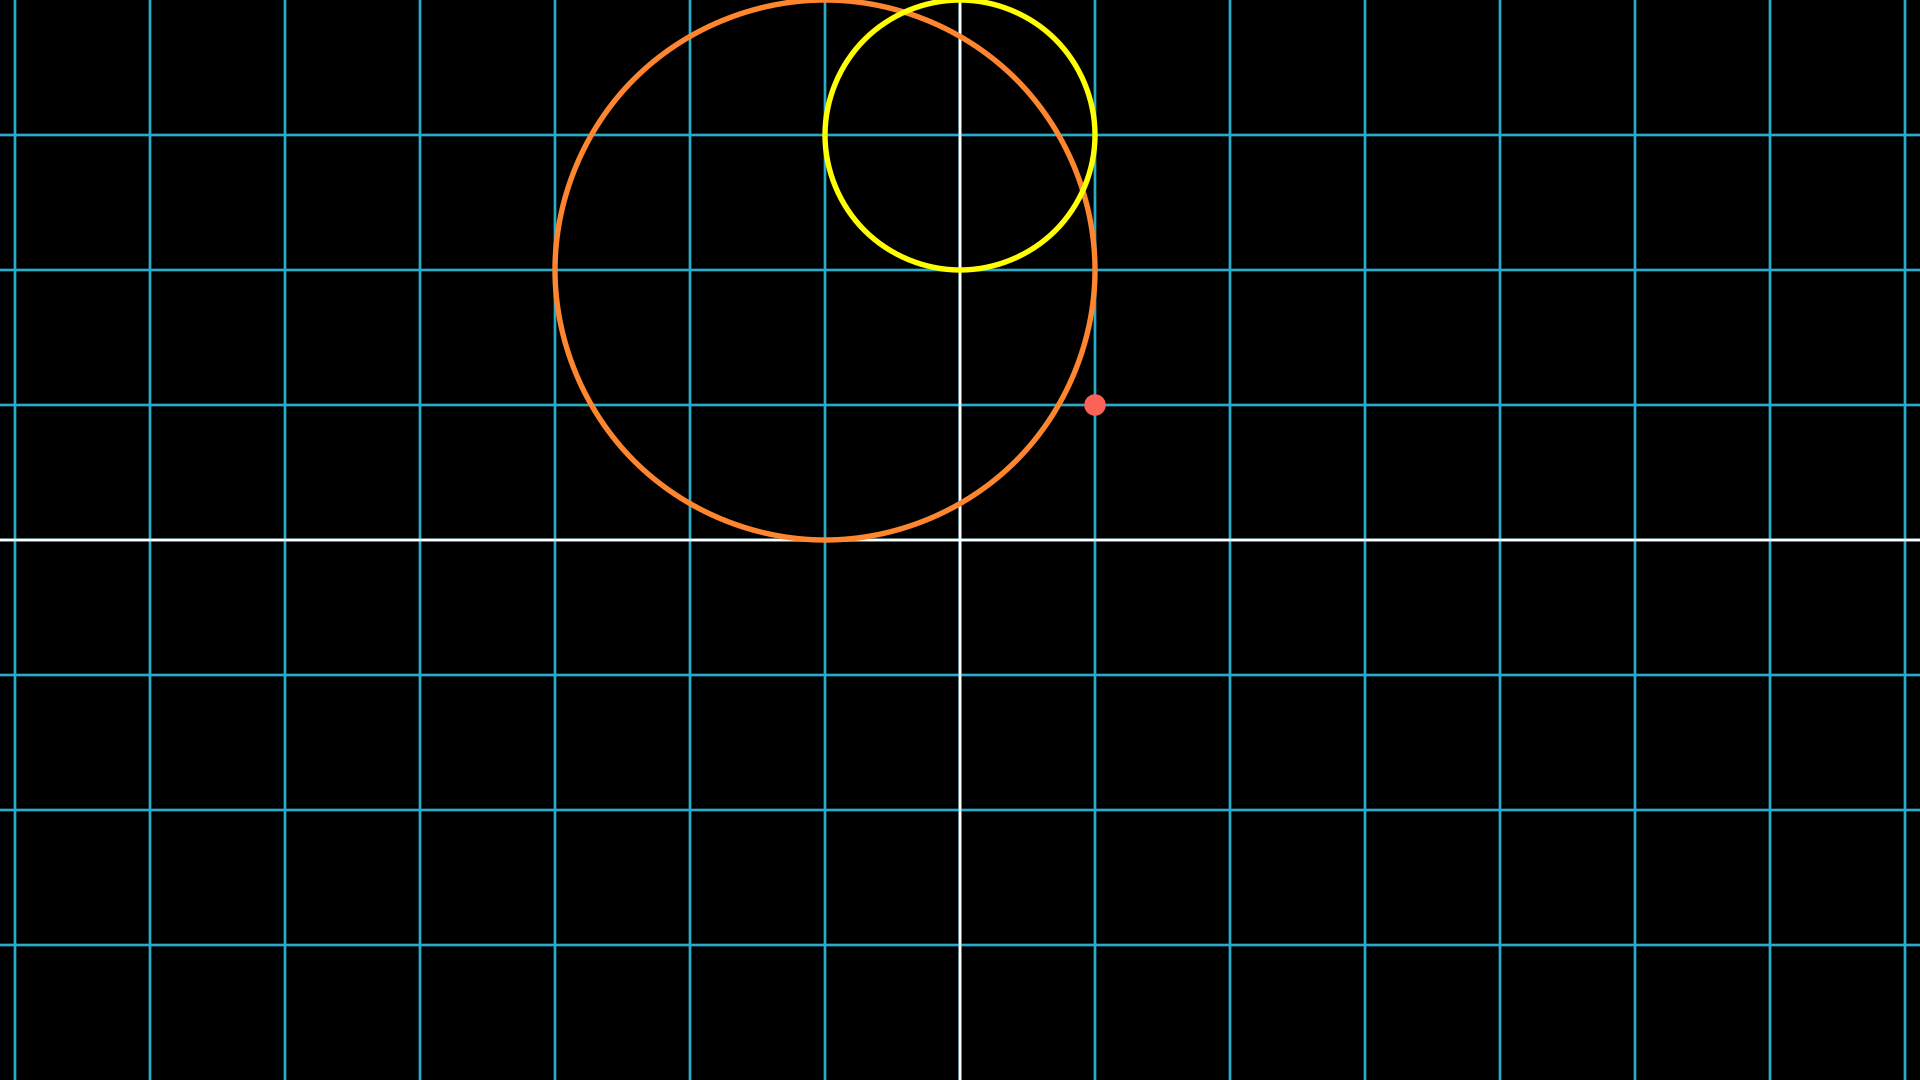

In [9]:
%%manim -qh PlaneExample

class PlaneExample(Scene):
    def construct(self):
        plane = NumberPlane()
        self.add(plane)
        
        # 放置坐标点
        red_dot = Dot(color=RED).shift(RIGHT+UP)
        self.add(red_dot)

        # 放置几何图形
        circle = Circle(radius=2,color=ORANGE).move_to([-1,2,0])    # 指定坐标
        self.add(circle)

        circle2 = Circle(radius=1,color=YELLOW).align_to(circle,UP)
        self.add(circle2)

## 曲线绘制

In [11]:
%%manim -qh CurveExample

class CurveExample(Scene):
    def construct(self):
        ax = Axes(x_range=[-2,2],y_range=[-2,2])
        curve = ax.plot(lambda x: np.sin(x),color = BLUE)
        area = ax.get_area(curve,x_range = (-1,1))    
        area2 = ax.get_area(curve,x_range = (-0.5,1.5))
        area3 = ax.get_area(curve,x_range = (-1.5,0.5))


        text = MathTex(r"\int_{-1}^1 \sin x\mathrm{d}x").to_corner(UL)

        self.add(ax,curve,area,text)
        self.play(ReplacementTransform(area,area2),run_time = 2)
        self.play(ReplacementTransform(area2,area3),run_time= 2)